# pyIsoDep

Copyright (c) Dan Kotlyar

# Decay Case

##  Description

Example on how to execute only decay (without transmutation)

## Load modules

In [1]:
import numpy as np
from pyIsoDep.functions.maindepletionsolver import MainDepletion
from pyIsoDep.functions.generatedata import TransmutationData
from pyIsoDep.functions.postprocessresults import Results

### Decay data pre-generated in advance

In [2]:
from pyIsoDep.tests.pregenerated_decay_isotopes import ID, N0,\
    timepoints, timeUnits, vol
# Metadata is defined in the pre-generated file

### Data Generation Stage

In [3]:
# Reset the data container
data = TransmutationData(libraryFlag=True, wgtFY=1.0)

### Depletion Stage

#### Execute Decay

In [4]:
dep = MainDepletion(0.0, data)
# define metadata (steps, flux, and so on)
dep.SetDepScenario(timeUnits=timeUnits, timepoints=timepoints)
# set initial composition
dep.SetInitialComposition(ID, N0, vol=vol)
# solve the Bateman equations
dep.SolveDecay(method="cram")

No attribute <EfissMeV> in data
No attribute <EfissJoule> in data
No attribute <xsData> in data
No attribute <transmutationmtx> in data


#### Post Decay analysis

In [5]:
dep.DecayHeat()
dep.Radiotoxicity()
dep.Activity()
dep.Mass()

### Post-process results

In [6]:
res = Results(dep)

In [7]:
res.getvalues("totalQt")

array([1.56602539e+07, 1.05738584e+07, 5.72598936e+06, 3.19174204e+05,
       8.44793164e+04, 4.59066647e+04, 1.84245030e+04, 1.12211458e+03,
       5.01962241e+02, 3.13646011e+02, 2.19046147e+02, 1.63311340e+02,
       1.28306043e+02, 1.05206592e+02, 8.91708518e+01, 7.74417476e+01,
       6.84223791e+01, 5.51416437e+01, 4.54841730e+01, 3.79714447e+01,
       3.19441303e+01, 2.70438717e+01, 2.30363183e+01])

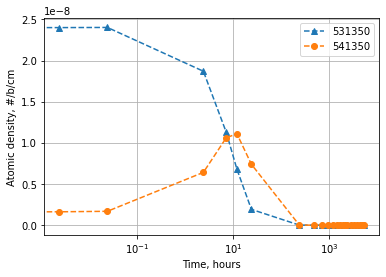

In [8]:
res.plot("Nt", timeUnits="hours", markers=['--^', '--o'], isotopes=[531350, 541350],
         ylabel="Atomic density, #/b/cm", pltType="semilogx")

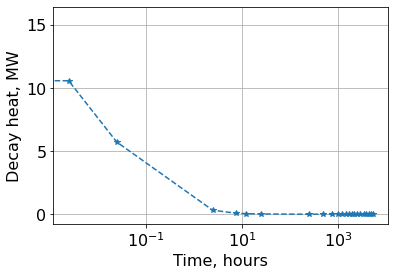

In [9]:
res.plot("totalQt", timeUnits="hours", norm=1E+6, ylabel="Decay heat, MW", pltType="semilogx")

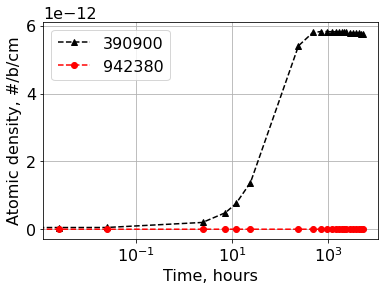

In [10]:
res.plot("Nt", timeUnits="hours", markers=['--k^', '--ro'], isotopes=[390900, 942380],
         ylabel="Atomic density, #/b/cm", pltType="semilogx")